 0. Import the relevant libraries and packages

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


# Creating the choice set
From   
![image.png](https://cdn.jamanetwork.com/ama/content_public/journal/psych/938422/m_yoi190087ea.png?Expires=1691689740&Signature=OvJ06Ayrw5fJLEycmRUj9I6GyITQwp89ZN5rVQDOm8dU1z6ZvhwNCwFV8yKnBDDEgxFqnaUQWgV7viAKHn5NpRdiVPo-Rgc8kjwYTn-0dnbudBGSoeVtaw8gTSIUiLLnWWVj2sPafVJA9NhK3bivpgCt2RLxI2UJRYUuNUmrrx1CFwyJTKYPlljeVSSEZ3Iwc9dNmvZ4p71MmTQSt8a9KcXSmZ0r0IZhQ187TDnqEFIiAN3mv9A7snMUAnhROj0Fg1p5COdoTVA9Z3RVNw8AT8QgJNSKl44244OjAauQwcnETbDdh2NPeCv4NGXYVclFTopaMriRPqUO4y-QPdDQjw__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA)

We now have all the elements to calculate subjective value.


In [2]:
''' Input should have this form

cols = ['crdm_lott_amt', 'crdm_lott_p', 'crdm_amb_lev', 'alpha', 'beta', 'gamma']

df_indif = pd.DataFrame([[20, 50, 0, 0.495323857, 0.495323857, 4.100226383]], columns= cols)
print(df_indif)
filename = 'csv/example_input.csv'
df_indif.to_csv(filename)

'''
subject_SE = 'csv/subject_input.csv'
df = pd.read_csv(subject_SE) 
df

,Unnamed: 0,crdm_lott_amt,crdm_lott_p,crdm_amb_lev,alpha,beta,gamma
0,0,20.0,50.0,0.0,0.495324,0.22168,4.100226


In [3]:
#Declare the variables
p = df['crdm_lott_p'].values[0]/100  #This is the probability of reward
v = df['crdm_lott_amt'].values[0] #The amount to be gained
alpha = df['alpha'].values[0] #Participant's or ADO alpha parameter
beta = df['beta'].values[0] #Participant's or ADO beta parameter
A= df['crdm_amb_lev'].values[0] #Ambiguity level

#SV calculation and our probabilities options
sv = (p - beta*A/2)*v**alpha  
p_options = [0.87, 0.75, 0.62, 0.5, 0.38, 0.25, 0.13]

#Confirme the SE trial structure
print ('The probability of reward: ' + str(p))
print ('The amount to be earned: ' + str(v))
print ('The alpha parameter from the model: ' + str(alpha))
print ('The beta parameter from the model: ' + str(beta))
print ('The ambiguity level of the SE trial: ' + str(A))
print('The SV of the equivalence trial is ' + str(sv))


The probability of reward: 0.5
The amount to be earned: 20.0
The alpha parameter from the model: 0.495323857
The beta parameter from the model: 0.221680178
The ambiguity level of the SE trial: 0.0
The SV of the equivalence trial is 2.204962459791904


From the SV, we compute V, using the formula:

# $v = \left(\frac{SV}{p-\frac{\beta A}{2}}\right)^\frac{1}{\alpha}$


# 2. Create the choice set. 
- We want to make 3 trials around the point of subjective equality. 

- We want 2 extreme trials. One at $50 and one at the -SV of the 50\$ trial for each probability option. 

- We want 4 intermediate trials.  


In [4]:
#First, we compute the Subjective indiference trials.

def SE_options(sv, alpha, beta, A): #This function take as parameters SV, alpha, beta and ambiguity level
  valuesP = {} #The output will be an empty dictionary with the probabilities as keys and rewards as values.
  for p in p_options: #A loop to iterate through all the probabilities optins.
    v_new = (sv / (p-beta*A/2)) ** (1 / alpha)
    valuesP[p] = v_new #for every p it includes the calculated value
  return valuesP


new_choicesp = SE_options(sv, alpha,beta,A)
SE_trials = {k: round(v, 2) for k, v in new_choicesp.items()}
print('Trials with the same subjective value for all of our Prob options: \n' + str(SE_trials))


Trials with the same subjective value for all of our Prob options: 
{0.87: 6.54, 0.75: 8.82, 0.62: 12.95, 0.5: 20.0, 0.38: 34.81, 0.25: 81.05, 0.13: 303.48}


- Next, we create new trials by adding and substracting \$2 from the SE trials values.

In [5]:
#Centered around subjective indifference +/- and $2
def centered ():
  cent_trials1 = {}
  for k,v1 in SE_trials.items():
    cent_trials1[k] = [float(v1) - 2.0,float(v1) + 2.0]
  return cent_trials1

cent_trials1 = centered()
print("Trials centered + - $2 around SE \n" + str(cent_trials1))

Trials centered + - $2 around SE 
{0.87: [4.54, 8.54], 0.75: [6.82, 10.82], 0.62: [10.95, 14.95], 0.5: [18.0, 22.0], 0.38: [32.81, 36.81], 0.25: [79.05, 83.05], 0.13: [301.48, 305.48]}


In [6]:
#Trials around SE (including the SE)
cent_trials = {}
for prob in SE_trials:
    value1 = float(SE_trials[prob]) #We convert the values in SE_trials into floats
    value2 = cent_trials1[prob] #We call the values from the cent_trials 1 dict. This have the plus/minus $2 but without the SE trials
    cent_trials[prob] = [value1] + value2 #Join the SE trials and the plus/minus $2 tirals
cent_trials
print('Trials around the SE and + - \$2: \n', cent_trials)

Trials around the SE and + - \$2: 
 {0.87: [6.54, 4.54, 8.54], 0.75: [8.82, 6.82, 10.82], 0.62: [12.95, 10.95, 14.95], 0.5: [20.0, 18.0, 22.0], 0.38: [34.81, 32.81, 36.81], 0.25: [81.05, 79.05, 83.05], 0.13: [303.48, 301.48, 305.48]}


In [7]:
# Convert the dictionary to a DataFrame
cent_Trials = pd.DataFrame(list(cent_trials.items()), columns=['p_reward', 'value_reward'])
cent_Trials = cent_Trials.explode('value_reward')
cent_Trials = cent_Trials.reset_index(drop=True)
cent_Trials
# Specify the filename for the new CSV file
#cent_trialsCSV = 'csv/cent_trials.csv'

# Save the DataFrame to a CSV file
#df.to_csv(cent_trialsCSV, index=False)

#print(f"CSV file '{cent_trialsCSV}' created successfully.")
#pd.read_csv(cent_trialsCSV)

,p_reward,value_reward
0,0.87,6.54
1,0.87,4.54
2,0.87,8.54
3,0.75,8.82
4,0.75,6.82
5,0.75,10.82
6,0.62,12.95
7,0.62,10.95
8,0.62,14.95
9,0.50,20.0


**Extreme trials:**

To create trials far way from the subjective equality point (SEP). We first make trials with a Value of reward of $50, which is the maximum amount we can pay to participants. Thus this is the highest subjective value we can reach.

In [8]:
extrpos = {} #Create an empty dict
for p in p_options: #Iterate through the probability levels
    extrpos[p] = 50 #Assign them the 50 dollars value
print(extrpos)

{0.87: 50, 0.75: 50, 0.62: 50, 0.5: 50, 0.38: 50, 0.25: 50, 0.13: 50}


In [9]:
#Now, lets calculate the SV of each extreme positive trial
svpos = []
for p in p_options:
    sv2 = (p - beta*A/2)*50**alpha 
    svpos.append(sv2)
print(svpos)
#Now, lets calculate the SV of each extreme Negative trial
svevil = []
for p in p_options:
    sv = (p - beta*A/2)*50**alpha 
    negsv = -sv
    svevil.append (negsv) 


[6.040315564667845, 5.2071685902309, 4.304592701257544, 3.4714457268206003, 2.638298752383656, 1.7357228634103001, 0.902575888973356]


In [10]:
# Convert the dictionary to a DataFrame
df1 = pd.DataFrame(SE_trials.items(), columns=['p_reward', 'SE_reward'])
#p_reward = df1['p_reward'].values
#value_reward = df1['value_reward'].values
df1['SV_SE_reward'] = (df1['p_reward'] - beta*A/2)*df1['SE_reward']**alpha
df1['SV_safe'] = 5.0**alpha
df1['MaxReward'] = 50
df1['SV_MaxReward'] = svpos
df1['deltaSV'] = df1['SV_MaxReward'] - df1['SV_SE_reward']
df1['SV_evil'] = df1['SV_SE_reward'] - df1['deltaSV'] 
df1

,p_reward,SE_reward,SV_SE_reward,SV_safe,MaxReward,SV_MaxReward,deltaSV,SV_evil
0,0.87,6.54,2.205436,2.219303,50,6.040316,3.834880,-1.629444
1,0.75,8.82,2.204826,2.219303,50,5.207169,3.002342,-0.797516
2,0.62,12.95,2.204578,2.219303,50,4.304593,2.100015,0.104563
3,0.50,20.00,2.204962,2.219303,50,3.471446,1.266483,0.938479
4,0.38,34.81,2.205090,2.219303,50,2.638299,0.433208,1.771882
5,0.25,81.05,2.204910,2.219303,50,1.735723,-0.469187,2.674098
6,0.13,303.48,2.204964,2.219303,50,0.902576,-1.302389,3.507353


In [11]:
#Exclude those trials for whom the SV of the maximum reward is less than SV of the SE
#This is the same as excluding those trials with SE points greater than $50
df5 = df1[df1['SV_MaxReward']> df1['SV_SE_reward']]
df5

,p_reward,SE_reward,SV_SE_reward,SV_safe,MaxReward,SV_MaxReward,deltaSV,SV_evil
0,0.87,6.54,2.205436,2.219303,50,6.040316,3.834880,-1.629444
1,0.75,8.82,2.204826,2.219303,50,5.207169,3.002342,-0.797516
2,0.62,12.95,2.204578,2.219303,50,4.304593,2.100015,0.104563
3,0.50,20.00,2.204962,2.219303,50,3.471446,1.266483,0.938479
4,0.38,34.81,2.205090,2.219303,50,2.638299,0.433208,1.771882


Now, let's find out what Value produces that SV_evil for all the probability levels

  **If SV<0:** 
# $v_{\text{evil}} = - \left( \frac{\left| SV \right|}{p - \frac{\beta \cdot A}{2}} \right) ^{\frac{1}{\alpha}}$

**BIG ASSUMPTION**
- In the previous formula, we are assuming that losses are represented equally than gains. 

In [12]:
SV_evil = df5.set_index('p_reward')['SV_evil'].to_dict() #Create a dictionary using Probability as key and SV_evil as a value
SV_evil

{0.87: -1.6294444870178513,
 0.75: -0.7975156961353616,
 0.62: 0.10456301490286268,
 0.5: 0.9384791927632081,
 0.38: 1.7718818572597947}

In [13]:
def ExtrNeg_options(SV_evil, alpha, beta, A):
    NegvaluesP = {}  # The output will be an empty dictionary with the probabilities as keys and rewards as values.
    for p, sv1 in SV_evil.items():  # A loop to iterate through all the probabilities options.
        if sv1 < 0.0:
            v_evil = - (abs(sv1) / (p - beta * A / 2)) ** (1 / alpha)  # Assuming losses are represented equally than gains!
        else:
            v_evil = (sv1 / (p - beta * A / 2)) ** (1 / alpha)

        NegvaluesP[p] = v_evil  # for every p it includes the calculated value

    return NegvaluesP

# Call the function and store the result
NegvaluesP = ExtrNeg_options(SV_evil, alpha, beta, A)
ExtrNeg = {k: round(v, 2) for k, v in NegvaluesP.items()}
print('Trials with the least SV for every prob option: \n' + str(ExtrNeg))


Trials with the least SV for every prob option: 
{0.87: -3.55, 0.75: -1.13, 0.62: 0.03, 0.5: 3.57, 0.38: 22.38}


In [14]:
# Make it a CSV
# Convert the dictionary to a DataFrame
df2 = pd.DataFrame(extrpos.items(), columns=['p_reward', 'value_reward'])
df3 = pd.DataFrame(ExtrNeg.items(), columns=['p_reward', 'value_reward'])
ExtrTrials = pd.concat([df2,df3], ignore_index=True)
ExtrTrials
# Specify the filename for the new CSV file
#Extr_trialsCSV = 'csv/Extr_trials.csv'

# Save the DataFrame to a CSV file
#df4.to_csv(Extr_trialsCSV, index=False)

#print(f"CSV file '{Extr_trialsCSV}' created successfully.")
#pd.read_csv(Extr_trialsCSV)


,p_reward,value_reward
0,0.87,50.00
1,0.75,50.00
2,0.62,50.00
3,0.50,50.00
4,0.38,50.00
5,0.25,50.00
6,0.13,50.00
7,0.87,-3.55
8,0.75,-1.13
9,0.62,0.03


In [15]:
#Intermediate possitive trials
p_options = [0.87, 0.75, 0.62, 0.5, 0.38, 0.25, 0.13]

svpos = [6.00, 5.00, 4.00, 3.00, 2.00]  #These are the subjective values for the different probability levels with a  $50 reward
        
def SV_pos_int(sv, alpha, beta, A): #This function take as parameters SV, alpha, beta and ambiguity level
    int_pos = {} #probabilities as keys and rewards as a list values.
    for p in p_options: #A loop to iterate through all the probabilities options.
      v = []
      for sv in svpos: #We want to use differente sv for each prob
        
        v_new = (sv / (p-beta*A/2)) ** (1 / alpha)  
        if v_new <50.0:
            v.append(v_new)  
        int_pos[p] = v #for every p it includes the calculated value
    return int_pos

int_choicesp = SV_pos_int(sv, alpha,beta,A)

print('Trials with positive subjective values: \n' + str(int_choicesp))

# Convert the dictionary to a DataFrame
dfint = pd.DataFrame(int_choicesp.items(), columns=['p_reward', 'value_reward'])
dfint = dfint.explode('value_reward')
dfint['value_reward'] = dfint['value_reward']#.apply(lambda x: np.round(float(x), 2)) #Rounding value_reward
Int_trials = dfint
Int_trials
#dfint['SV_reward'] = (dfint['p_reward'] - beta*A/2)*dfint['value_reward']**alpha
dfint
# Specify the filename for the new CSV file
#int_trialsCSV = 'csv/int_trials.csv'

# Save the DataFrame to a CSV file
#dfint.to_csv(int_trialsCSV, index=False)

#print(f"CSV file '{int_trialsCSV}' created successfully.")
#pd.read_csv(int_trialsCSV)

Trials with positive subjective values: 
{0.87: [49.32854837726086, 34.138215060741324, 21.756599193158557, 12.171792788765442, 5.368429152669346], 0.75: [46.0652921318192, 29.357835371431012, 16.42432650871801, 7.244030092571507], 0.62: [43.11457163426678, 24.120572680021557, 10.638497368606732], 0.5: [37.23873283486285, 16.42432650871801], 0.38: [28.583194357327535], 0.25: [], 0.13: []}


,p_reward,value_reward
0,0.87,49.328548
0,0.87,34.138215
0,0.87,21.756599
0,0.87,12.171793
0,0.87,5.368429
1,0.75,46.065292
1,0.75,29.357835
1,0.75,16.424327
1,0.75,7.24403
2,0.62,43.114572


In [16]:
#Intermediate pos and neg trials
p_options = [0.87, 0.75, 0.62, 0.5, 0.38, 0.25, 0.13]

# definte method to get deltaSV_max for a participants
# for now is set A=0
delta_SV_max = (0.87 - beta*A/2)*50**alpha - 5.0**alpha
deltasv = np.linspace(0,delta_SV_max,num=5)
deltasv = deltasv[1:-1].tolist()
deltasv_neg = [-1.0*d for d in deltasv]
deltasv = sorted(deltasv + deltasv_neg)

SV_target = deltasv + 5.0**alpha
print(deltasv)
print(SV_target)

[-2.8657597368126195, -1.910506491208413, -0.9552532456042065, 0.9552532456042065, 1.910506491208413, 2.8657597368126195]
[-0.64645715  0.30879609  1.26404934  3.17455583  4.12980907  5.08506232]


In [17]:
  #These are the subjective values for the different probability levels with a  $50 reward
        
def SV_pos_int(sv, alpha, beta, A): #This function take as parameters SV, alpha, beta and ambiguity level
    int_pos = {} #probabilities as keys and rewards as a list values.
    for p in p_options: #A loop to iterate through all the probabilities options.
      v = []
      for sv in SV_target: #We want to use differente sv for each prob
        if sv < 0.0:
            v_new = - (abs(sv) / (p - beta * A / 2)) ** (1 / alpha)  # Assuming losses are represented equally than gains!
        else:
            v_new = (sv / (p - beta * A / 2)) ** (1 / alpha)  
        
        if v_new <50.0:
            v.append(v_new)  
        int_pos[p] = v #for every p it includes the calculated value
    return int_pos

int_choicesp = SV_pos_int(sv, alpha,beta,A)

print('Trials with positive subjective values: \n' + str(int_choicesp))

# Convert the dictionary to a DataFrame
dfint = pd.DataFrame(int_choicesp.items(), columns=['p_reward', 'value_reward'])
dfint = dfint.explode('value_reward')
#dfint['value_reward'] = dfint['value_reward']#.apply(lambda x: np.round(float(x), 2)) #Rounding value_reward
Int_trials = dfint.reset_index(drop=True)
Int_trials
#dfint['SV_reward'] = (dfint['p_reward'] - beta*A/2)*dfint['value_reward']**alpha
# Specify the filename for the new CSV file
#int_trialsCSV = 'csv/int_trials.csv'

# Save the DataFrame to a CSV file
#dfint.to_csv(int_trialsCSV, index=False)

#print(f"CSV file '{int_trialsCSV}' created successfully.")
#pd.read_csv(int_trialsCSV)

Trials with positive subjective values: 
{0.87: [-0.5490421739029174, 0.12354109427959475, 2.1259493501225175, 13.644000681575926, 23.20560299275673, 35.32089415384346], 0.75: [-0.7408643975241789, 0.16670340227655034, 2.8687052822356405, 18.410888680771194, 31.313086494251625, 47.66117105592254], 0.62: [-1.0880247380029204, 0.24481865533323824, 4.212946827439042, 27.038014514178716, 45.98603042989258], 0.5: [-1.6797554135093693, 0.3779651760298372, 6.504190569423302, 41.74284799268479], 0.38: [-2.923272100784544, 0.6577713905667846, 11.319218665328043], 0.25: [-6.807534240456539, 1.5317771008981174, 26.35949237115328], 0.13: [-25.48856184624777, 5.735233050886485]}


,p_reward,value_reward
0,0.87,-0.549042
1,0.87,0.123541
2,0.87,2.125949
3,0.87,13.644001
4,0.87,23.205603
5,0.87,35.320894
6,0.75,-0.740864
7,0.75,0.166703
8,0.75,2.868705
9,0.75,18.410889


# 4. The new choices CSV

In [18]:
crdm_trials = pd.concat([ExtrTrials, cent_Trials, Int_trials],ignore_index=True)
crdm_trials

,p_reward,value_reward
0,0.87,50.0
1,0.75,50.0
2,0.62,50.0
3,0.50,50.0
4,0.38,50.0
...,...,...
57,0.25,-6.807534
58,0.25,1.531777
59,0.25,26.359492
60,0.13,-25.488562


In [19]:
# Filter rows where 'value_reward' is less than or equal to 50
crdm_50filtered = crdm_trials[crdm_trials['value_reward'] <= 60]

# Specify the filename for the new CSV file with the filtered data
crdm_trials_50cap = 'csv/crdm_trials_50cap.csv'

# Save the filtered DataFrame to a new CSV file
crdm_50filtered.to_csv(crdm_trials_50cap, index=False)

print(f"CSV file filtered successfully.")
pd.read_csv(crdm_trials_50cap)

CSV file filtered successfully.


,p_reward,value_reward
0,0.87,50.000000
1,0.75,50.000000
2,0.62,50.000000
3,0.50,50.000000
4,0.38,50.000000
5,0.25,50.000000
6,0.13,50.000000
7,0.87,-3.550000
8,0.75,-1.130000
9,0.62,0.030000


# 5. Let's check that it works
# - *a.k.a* Sanity check

Hey Santiago. I think for visualization, it would be helpful 
if you edit the scatter plot in the following way:
Compute SV_delta = SV_lottery - SV_safe then plot SV_delta as
a function of v_reward
Include the maximum value for the reward as red vertical lines 
at x = +50 and another at x = -50
Project the scatterplot as histograms on each axis

In [34]:
df88 = crdm_trials
df_pos = df88[df88['value_reward']>0].reset_index(drop=True)
df_pos['SV_reward'] = (df_pos['p_reward'] - beta*A/2)*(df_pos['value_reward'])**alpha
df_pos['SV_safe'] = 5.0**alpha
df_pos['deltaSV'] = df_pos['SV_reward'] - df_pos['SV_safe']
df_pos

,p_reward,value_reward,SV_reward,SV_safe,deltaSV
0,0.87,50.0,6.040316,2.219303,3.821013
1,0.75,50.0,5.207169,2.219303,2.987866
2,0.62,50.0,4.304593,2.219303,2.08529
3,0.50,50.0,3.471446,2.219303,1.252143
4,0.38,50.0,2.638299,2.219303,0.418996
5,0.25,50.0,1.735723,2.219303,-0.48358
6,0.13,50.0,0.902576,2.219303,-1.316727
7,0.62,0.03,0.109163,2.219303,-2.11014
8,0.50,3.57,0.939117,2.219303,-1.280185
9,0.38,22.38,1.771746,2.219303,-0.447556


In [35]:

df_neg = df88.loc[df88['value_reward']<=0].reset_index(drop=True)
df_neg['SV_reward'] = (df_neg['p_reward'] - beta*A/2)*(-1.0)*np.abs(df_neg['value_reward'])**alpha
df_neg['SV_safe'] = 5.0**alpha
df_neg['deltaSV'] = df_neg['SV_reward'] - df_neg['SV_safe']
df_neg

,p_reward,value_reward,SV_reward,SV_safe,deltaSV
0,0.87,-3.55,-1.629523,2.219303,-3.848826
1,0.75,-1.13,-0.796805,2.219303,-3.016108
2,0.87,-0.549042,-0.646457,2.219303,-2.86576
3,0.75,-0.740864,-0.646457,2.219303,-2.86576
4,0.62,-1.088025,-0.646457,2.219303,-2.86576
5,0.50,-1.679755,-0.646457,2.219303,-2.86576
6,0.38,-2.923272,-0.646457,2.219303,-2.86576
7,0.25,-6.807534,-0.646457,2.219303,-2.86576
8,0.13,-25.488562,-0.646457,2.219303,-2.86576


In [41]:
#Concatenate the 2 trials set
df_posandneg= pd.concat([df_pos,df_neg],ignore_index=True)

#Adding the $50 cap
dfFINAL = df_posandneg[df_posandneg['value_reward'] <= 60]
dfFINAL

,p_reward,value_reward,SV_reward,SV_safe,deltaSV
0,0.87,50.0,6.040316,2.219303,3.821013
1,0.75,50.0,5.207169,2.219303,2.987866
2,0.62,50.0,4.304593,2.219303,2.08529
3,0.50,50.0,3.471446,2.219303,1.252143
4,0.38,50.0,2.638299,2.219303,0.418996
5,0.25,50.0,1.735723,2.219303,-0.48358
6,0.13,50.0,0.902576,2.219303,-1.316727
7,0.62,0.03,0.109163,2.219303,-2.11014
8,0.50,3.57,0.939117,2.219303,-1.280185
9,0.38,22.38,1.771746,2.219303,-0.447556


Text(0, 0.5, 'SV difference (no ambiuguity)')

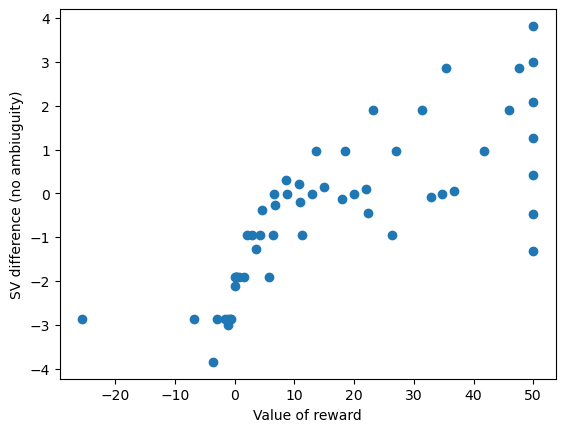

In [42]:
#Scatter Plot
df = dfFINAL
plt.figure()
x = df['value_reward']
y = df['deltaSV']
plt.scatter(x,y)
plt.xlabel('Value of reward')
plt.ylabel('SV difference (no ambiuguity)')


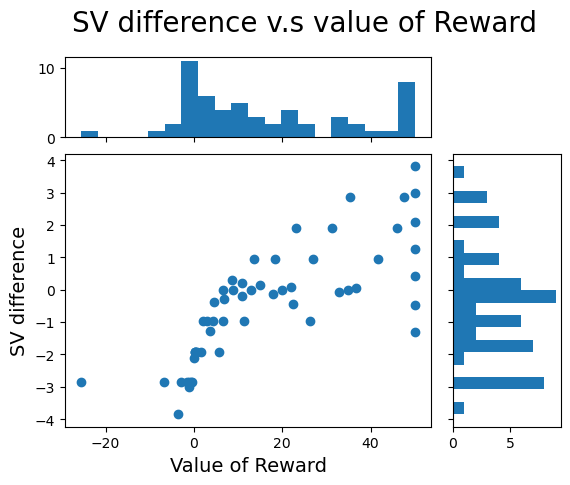

In [43]:
from matplotlib.gridspec import GridSpec

def scatter_hist(x, y, ax, ax_histx, ax_histy,xlabel='',ylabel='',title=''):
	ax.scatter(x, y)
	ax.set_xlabel(xlabel,fontsize=14)
	ax.set_ylabel(ylabel,fontsize=14)
	plt.suptitle(title,fontsize=20)
	ax_histx.hist(x,bins=20)
	ax_histy.hist(y, bins=20,orientation = 'horizontal')


def setup_fig_ax():

	fig = plt.figure()
	gs = GridSpec(4, 4)

	ax = fig.add_subplot(gs[1:4, 0:3])
	ax_histx = fig.add_subplot(gs[0,0:3])
	ax_histy = fig.add_subplot(gs[1:4, 3])
	ax_histx.tick_params(axis="x", labelbottom=False)
	ax_histy.tick_params(axis="y", labelleft=False)

	return ax,ax_histx,ax_histy

# delta SV v.s value_reward
x,y = df['value_reward'],df['deltaSV'] 
ax,ax_histx,ax_histy = setup_fig_ax()

scatter_hist(x,y,ax,ax_histx,ax_histy, 
    xlabel='Value of Reward',
    ylabel= 'SV difference',
    title= 'SV difference v.s value of Reward')

[0.13 0.25 0.87 0.38 0.5  0.75 0.62]
index 0 with p_reward is 0.87
index 1 with p_reward is 0.75
index 2 with p_reward is 0.62
index 3 with p_reward is 0.5
index 4 with p_reward is 0.38
index 5 with p_reward is 0.25
index 6 with p_reward is 0.13


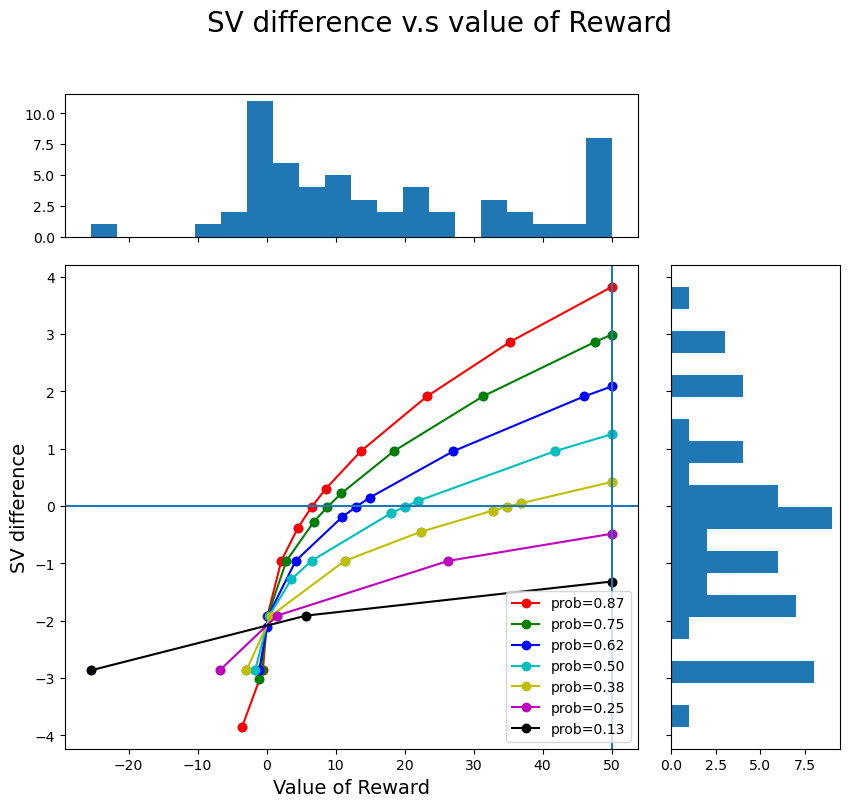

In [44]:
from matplotlib.gridspec import GridSpec
import sys

def scatter_hist(x, y, ax, ax_histx, ax_histy,xlabel='',ylabel='',title=''):
	ax.scatter(x, y)
	ax.set_xlabel(xlabel,fontsize=14)
	ax.set_ylabel(ylabel,fontsize=14)
	plt.suptitle(title,fontsize=20)
	ax_histx.hist(x,bins=20)
	ax_histy.hist(y, bins=20,orientation = 'horizontal')


def setup_fig_ax():

	fig = plt.figure(figsize=(10,8.5))
	gs = GridSpec(4, 4)

	ax = fig.add_subplot(gs[1:4, 0:3])
	ax_histx = fig.add_subplot(gs[0,0:3])
	ax_histy = fig.add_subplot(gs[1:4, 3])
	ax_histx.tick_params(axis="x", labelbottom=False)
	ax_histy.tick_params(axis="y", labelleft=False)

	return ax,ax_histx,ax_histy

# delta SV v.s value_reward
x,y = df['value_reward'],df['deltaSV'] 
ax,ax_histx,ax_histy = setup_fig_ax()

scatter_hist(x,y,ax,ax_histx,ax_histy, 
    xlabel='Value of Reward',
    ylabel= 'SV difference',
    title= 'SV difference v.s value of Reward')

colors = ['r','g','b','c','y','m','k']
df = df.sort_values('value_reward')
print(df['p_reward'].unique())

for i,p in enumerate(reversed(sorted(df['p_reward'].unique()))):
	print('index {} with p_reward is {}'.format(i,p))
	x,y = df.loc[df['p_reward']==p,'value_reward'], df.loc[df['p_reward']==p,'deltaSV']
	ax.plot(x, y,'{}o-'.format(colors[i]),label='prob={0:0.2f}'.format(p))

# ax.plot([50],[],'r-')
ax.axvline(x=50)
# ax.plot([-50,-50],[-10,10],'r-')
ax.axhline(y=0)
# ax.plot([0,50],[0,0],'k--')
ax.legend(loc="lower right")




# To do:
- Is SV symmetrical in the losses --> prospect theory
- What to when SE_trials_reward > $50?
- Add ambiguity to the choice set. 

    

In [ ]:
#Inserting amibuity
import random
df = pd.read_csv(crdm_trials_50cap)

#Define the ambiguity options
crdm_amb_lvl = [24,50,74]


# number of ambiguous trials by type
N_AMB = 10
crdm_amb_opt = [N_AMB*[a] for a in crdm_amb_lvl]
crdm_amb_opt = [item for sublist in crdm_amb_opt for item in sublist]
print(crdm_amb_opt)
random.shuffle(crdm_amb_opt)
print(crdm_amb_opt)



In [ ]:

#Define the number of ambiguous trials by picking X number of random rows.
amb_trials = df.sample(n=len(crdm_amb_opt))

#Assign ambiguity values that match the number of random rows
# amb_levels = [random.choice(crdm_amb_opt) for x in range(15)]
#Assign those values to the random rows
amb_trials['crdm_amb_lev'] = crdm_amb_opt
amb_trials





In [ ]:

crdm_trials['crdm_amb_lev'] = 0.0
# choice_set = crdm_trials
choice_set = pd.concat([crdm_trials,amb_trials],ignore_index=True)

print(choice_set)



In [ ]:
import matplotlib.pyplot as plt

choice_set['SV_lottery'] = (choice_set['p_reward'] - beta*(choice_set['crdm_amb_lev']/100.0/2))*choice_set['value_reward']**alpha
choice_set['SV_safe'] = 5.0**alpha
choice_set['SV_diff'] = choice_set['SV_lottery'] - choice_set['SV_safe']
print(choice_set)

plt.figure(1)
plt.hist(choice_set.loc[choice_set['crdm_amb_lev']==0.0,'SV_diff'],bins=10)

plt.figure(2)
plt.hist(choice_set.loc[choice_set['crdm_amb_lev']>0.0,'SV_diff'],bins=10)



In [ ]:
plt.figure(4)
x = choice_set.loc[choice_set['crdm_amb_lev']==0.0,'value_reward']
y = choice_set.loc[choice_set['crdm_amb_lev']==0.0,'SV_diff']
plt.scatter(x,y)
plt.xlabel('Value of Reward')
plt.ylabel('SV difference (no ambiuguity)')


plt.figure(5)
x = choice_set.loc[choice_set['crdm_amb_lev']>0.0,'crdm_amb_lev']
y = choice_set.loc[choice_set['crdm_amb_lev']>0.0,'SV_diff']
plt.scatter(x,y)
plt.xlabel('Ambiguity level')
plt.ylabel('SV difference (ambiuguity)')



## It's not much but it's honest work
![python](https://plantillasdememes.com/img/plantillas/no-es-mucho-pero-es-trabajo-honesto01569991155.jpg)